# MLP on MNIST DataSet

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
import warnings
warnings.filterwarnings("ignore")
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [3]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 40s 4us/step


In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [7]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [8]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# MLP + ReLU + ADAM (2 Layers)

In [12]:
model_relu = Sequential()
model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(180,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(output_dim,activation='softmax'))

model_relu.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.2391 - acc: 0.9310 - val_loss: 0.1255 - val_acc: 0.9597
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0903 - acc: 0.9727 - val_loss: 0.0776 - val_acc: 0.9763
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0555 - acc: 0.9828 - val_loss: 0.0768 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0399 - acc: 0.9867 - val_loss: 0.0726 - val_acc: 0.9788
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0299 - acc: 0.9906 - val_loss: 0.0791 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0223 - acc: 0.9930 - val_loss: 0.0737 - val_acc: 0.9793: 1

## MLP + ReLU + ADAM (2 Layers ) With Batch Normalization¶

In [13]:
model_batch=Sequential()
model_batch.add(Dense(400,activation='relu',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(180,activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim,activation='softmax'))

model_batch.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_batch.fit(X_train,Y_train,batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1929 - acc: 0.9418 - val_loss: 0.1006 - val_acc: 0.9688
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0714 - acc: 0.9780 - val_loss: 0.0821 - val_acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0463 - acc: 0.9859 - val_loss: 0.0870 - val_acc: 0.9727
Epoch 4/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0351 - acc: 0.9889 - val_loss: 0.0818 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0833 - val_acc: 0.9762
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0749 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0204 - acc: 0.9932 - val_loss: 0.0759 - 

10000/10000 [==============================] - 1s 76us/step
Test Score =  0.09612434984160136
Accuract =  0.9787


<IPython.core.display.Javascript object>


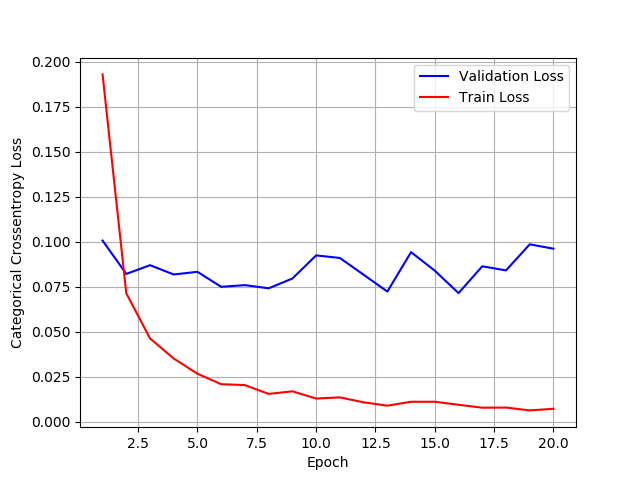

In [14]:
score = model_batch.evaluate(X_test,Y_test)
print('Test Score = ',score[0])
print('Accuract = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + ReLU + ADAM (2 Layers ) With Dropouts

In [15]:
model_drop=Sequential()

model_drop.add(Dense(400,activation='relu',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.4))

model_drop.add(Dense(180,activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.4))

model_drop.add(Dense(output_dim,activation='softmax'))

model_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_drop.fit(X_train,Y_train,batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.3509 - acc: 0.8929 - val_loss: 0.1269 - val_acc: 0.9597
Epoch 2/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.1690 - acc: 0.9481 - val_loss: 0.0892 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1289 - acc: 0.9605 - val_loss: 0.0828 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.1103 - acc: 0.9653 - val_loss: 0.0866 - val_acc: 0.9735
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0985 - acc: 0.9688 - val_loss: 0.0705 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0862 - acc: 0.9730 - val_loss: 0.0667 - val_acc: 0.9786
Epoch 

10000/10000 [==============================] - 1s 78us/step
[0.05910039004018326, 0.9831]
Test Score =  0.05910039004018326
Accuracy =  0.9831


<IPython.core.display.Javascript object>


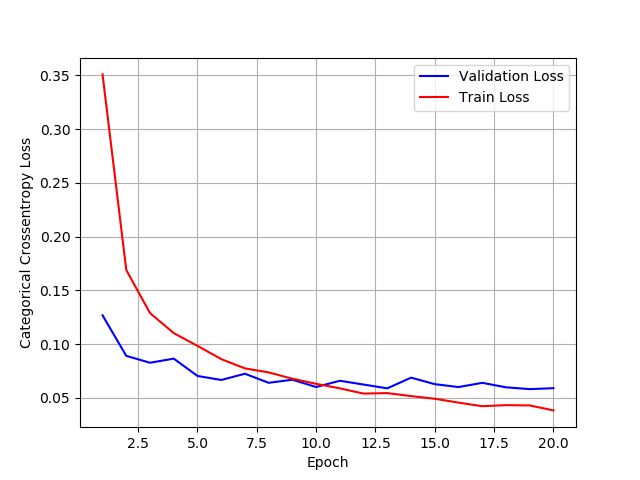

In [16]:
score = model_drop.evaluate(X_test,Y_test)
print(score)
print('Test Score = ',score[0])
print('Accuracy = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + ReLU + ADAM (3 Layers )

In [17]:
model_relu = Sequential()
model_relu.add(Dense(464, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(240,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(84,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(output_dim,activation='softmax'))

model_relu.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2309 - acc: 0.9313 - val_loss: 0.1094 - val_acc: 0.9656
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0823 - acc: 0.9749 - val_loss: 0.0804 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0554 - acc: 0.9827 - val_loss: 0.0815 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0387 - acc: 0.9877 - val_loss: 0.0664 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0778 - val_acc: 0.9775
Epoch 6/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0238 - acc: 0.9923 - val_loss: 0.0828 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0213 - acc: 0.9930 - val_loss: 0.0766 -

10000/10000 [==============================] - ETA:  - 1s 79us/step
Test Score =  0.07045836307603731
Accuracy =  0.984


<IPython.core.display.Javascript object>


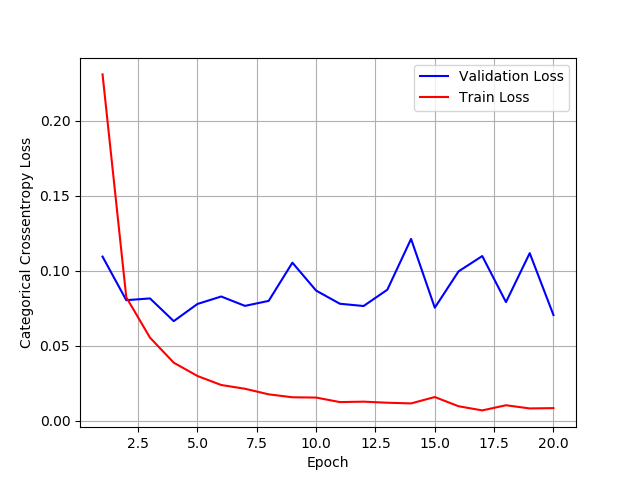

In [18]:
score = model_relu.evaluate(X_test,Y_test)
print('Test Score = ',score[0])
print('Accuracy = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + ReLU + ADAM (3 Layers ) With Batch Normalization

In [19]:
model_batch=Sequential()

model_batch.add(Dense(464,activation='relu',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(240,activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(84,activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim,activation='softmax'))

model_batch.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_batch.fit(X_train,Y_train,batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.1981 - acc: 0.9408 - val_loss: 0.1051 - val_acc: 0.9680
Epoch 2/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0723 - acc: 0.9782 - val_loss: 0.0951 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0489 - acc: 0.9843 - val_loss: 0.0822 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0354 - acc: 0.9883 - val_loss: 0.0869 - val_acc: 0.9738
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0301 - acc: 0.9902 - val_loss: 0.0819 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0246 - acc: 0.9918 - val_loss: 0.0773 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0217 - acc: 0.9930 - val_loss: 0.

10000/10000 [==============================] - 1s 97us/step
Test Score =  0.07474392212562816
Accuracy =  0.9813


<IPython.core.display.Javascript object>


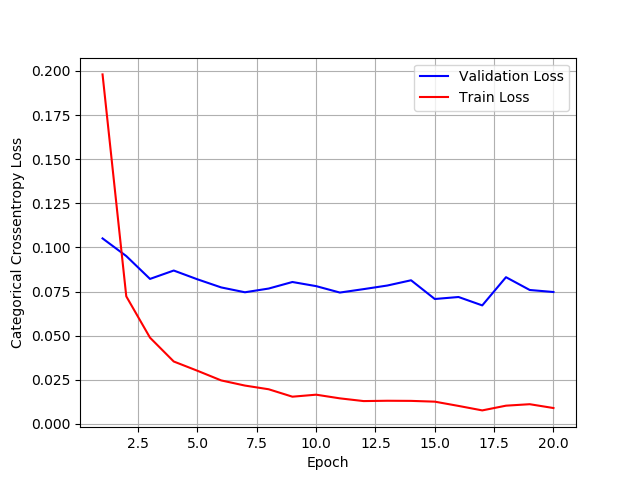

In [20]:
score = model_batch.evaluate(X_test,Y_test)
print('Test Score = ',score[0])
print('Accuracy = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + ReLU + ADAM (3 Layers )With Dropout

In [21]:
model_drop=Sequential()

model_drop.add(Dense(464,activation='relu',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(240,activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(84,activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim,activation='softmax'))

model_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_drop.fit(X_train,Y_train,batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.6073 - acc: 0.8131 - val_loss: 0.1667 - val_acc: 0.9474
Epoch 2/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.2634 - acc: 0.9232 - val_loss: 0.1237 - val_acc: 0.9634
Epoch 3/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.2047 - acc: 0.9402 - val_loss: 0.1009 - val_acc: 0.9698
Epoch 4/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1729 - acc: 0.9501 - val_loss: 0.0931 - val_acc: 0.9722
Epoch 5/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.1559 - acc: 0.9554 - val_loss: 0.0901 - val_acc: 0.9730
Epoch 6/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.1397 - acc: 0.9592 - val_loss: 0.0818 - val_acc: 0.9759
Epoch 7/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.1285 - acc: 0.9621 - val_loss: 0.

10000/10000 [==============================] - 1s 101us/step
Test Score =  0.05744417907181196
Accuracy =  0.9833


<IPython.core.display.Javascript object>


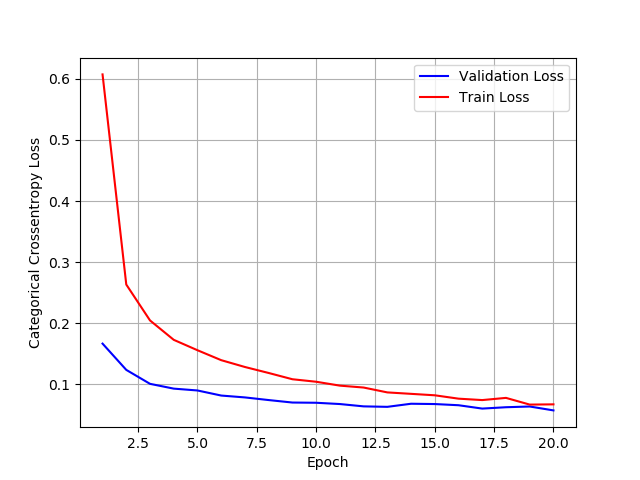

In [22]:
score = model_drop.evaluate(X_test,Y_test)
print('Test Score = ',score[0])
print('Accuracy = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + ReLU + ADAM (5 Layers)

In [23]:
model_relu = Sequential()

model_relu.add(Dense(560, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(432,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(264,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(132,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(84,activation='relu',kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(output_dim,activation='softmax'))

model_relu.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.2311 - acc: 0.9302 - val_loss: 0.1009 - val_acc: 0.9700
Epoch 2/20
60000/60000 [==============================] - 16s 262us/step - loss: 0.0891 - acc: 0.9729 - val_loss: 0.1045 - val_acc: 0.9663
Epoch 3/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.0591 - acc: 0.9818 - val_loss: 0.0701 - val_acc: 0.9776
Epoch 4/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.0454 - acc: 0.9858 - val_loss: 0.0779 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.0356 - acc: 0.9888 - val_loss: 0.0942 - val_acc: 0.9754
Epoch 6/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0920 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.

10000/10000 [==============================] - 1s 127us/step
Test Score =  0.09520263905403308
Accuracy =  0.9814


<IPython.core.display.Javascript object>


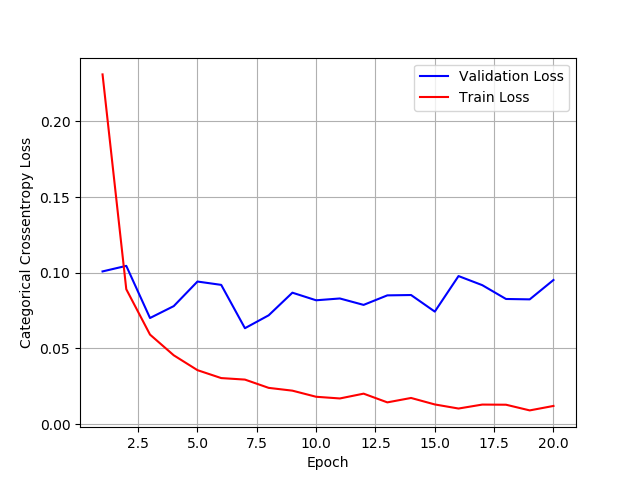

In [24]:
score = model_relu.evaluate(X_test,Y_test)
print('Test Score = ',score[0])
print('Accuracy = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + ReLU + ADAM (5 Layer) With Batch Normalization

In [25]:
model_batch=Sequential()

model_batch.add(Dense(560,activation='relu',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(432,activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(264,activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(132,activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(84,activation='relu',kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim,activation='softmax'))

model_batch.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 359us/step - loss: 0.2098 - acc: 0.9380 - val_loss: 0.1076 - val_acc: 0.9657
Epoch 2/20
60000/60000 [==============================] - 18s 298us/step - loss: 0.0836 - acc: 0.9742 - val_loss: 0.0769 - val_acc: 0.9773
Epoch 3/20
60000/60000 [==============================] - 18s 298us/step - loss: 0.0601 - acc: 0.9807 - val_loss: 0.0832 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0429 - acc: 0.9859 - val_loss: 0.0831 - val_acc: 0.9764
Epoch 5/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0386 - acc: 0.9872 - val_loss: 0.0856 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0368 - acc: 0.9877 - val_loss: 0.0748 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.0284 - acc: 0.9908 - val_loss: 0.

10000/10000 [==============================] - 2s 192us/step
Test Score =  0.0758796807357634
Accuracy =  0.9804


<IPython.core.display.Javascript object>


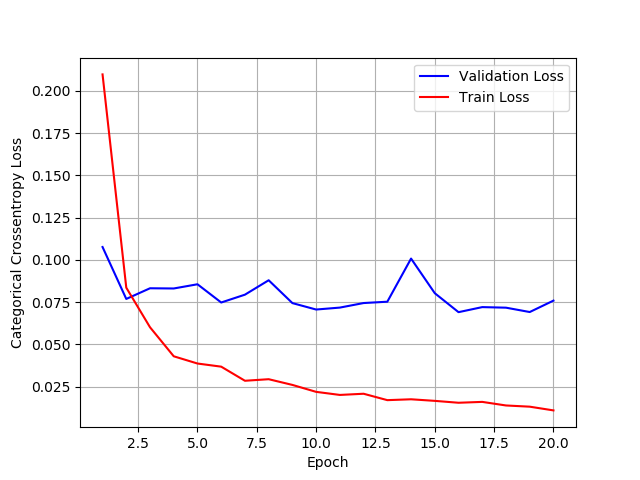

In [26]:
score = model_batch.evaluate(X_test,Y_test)
print('Test Score = ',score[0])
print('Accuracy = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + ReLU + ADAM (5 Layers ) With Dropout

In [27]:
model_drop=Sequential()

model_drop.add(Dense(560,activation='relu',input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.75))

model_drop.add(Dense(432,activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.75))

model_drop.add(Dense(264,activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.75))

model_drop.add(Dense(132,activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.75))

model_drop.add(Dense(84,activation='relu',kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.75))

model_drop.add(Dense(output_dim,activation='softmax'))

model_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_drop.fit(X_train,Y_train,batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 504us/step - loss: 2.7106 - acc: 0.1605 - val_loss: 2.0037 - val_acc: 0.2657
Epoch 2/20
60000/60000 [==============================] - 23s 384us/step - loss: 1.7655 - acc: 0.3382 - val_loss: 1.3795 - val_acc: 0.4429
Epoch 3/20
60000/60000 [==============================] - 23s 388us/step - loss: 1.4375 - acc: 0.4682 - val_loss: 0.9939 - val_acc: 0.6771
Epoch 4/20
60000/60000 [==============================] - 23s 382us/step - loss: 1.1480 - acc: 0.5914 - val_loss: 0.5902 - val_acc: 0.8467
Epoch 5/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.9271 - acc: 0.6798 - val_loss: 0.4687 - val_acc: 0.8945
Epoch 6/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.7926 - acc: 0.7370 - val_loss: 0.3930 - val_acc: 0.9136
Epoch 7/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.6961 - acc: 0.7833 - val_loss: 0.

10000/10000 [==============================] - 2s 171us/step
Test Score =  0.12517516004778445
Accuracy =  0.9705


<IPython.core.display.Javascript object>


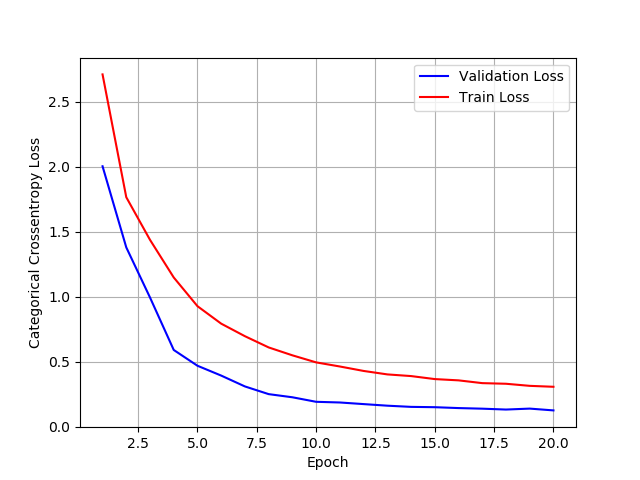

In [28]:
score = model_drop.evaluate(X_test,Y_test)
print('Test Score = ',score[0])
print('Accuracy = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

In [29]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Activation", "BatchNormalization", "Dropout","Accuracy", "Test Loss"]

x.add_row(["ReLU", 'No', 'No', 0.9834,0.083])
x.add_row(["ReLU", 'Yes','No', 0.9807,0.079])
x.add_row(["ReLU", 'Yes', 'Yes',0.9839,0.058])
x.add_row(["ReLU", 'No', 'No' ,0.9823,0.089])
x.add_row(["ReLU", 'Yes', 'No', 0.9809,0.0811])
x.add_row(["ReLU", 'Yes', 'Yes', 0.9847,0.0558])
x.add_row(["ReLU", 'No','No' , 0.9846,0.064])
x.add_row(["ReLU", 'Yes', 'No', 0.9816,0.0711])
x.add_row(["ReLU", 'Yes', 'Yes', 0.9697,0.1302])

print(x)

+------------+--------------------+---------+----------+-----------+
| Activation | BatchNormalization | Dropout | Accuracy | Test Loss |
+------------+--------------------+---------+----------+-----------+
|    ReLU    |         No         |    No   |  0.9834  |   0.083   |
|    ReLU    |        Yes         |    No   |  0.9807  |   0.079   |
|    ReLU    |        Yes         |   Yes   |  0.9839  |   0.058   |
|    ReLU    |         No         |    No   |  0.9823  |   0.089   |
|    ReLU    |        Yes         |    No   |  0.9809  |   0.0811  |
|    ReLU    |        Yes         |   Yes   |  0.9847  |   0.0558  |
|    ReLU    |         No         |    No   |  0.9846  |   0.064   |
|    ReLU    |        Yes         |    No   |  0.9816  |   0.0711  |
|    ReLU    |        Yes         |   Yes   |  0.9697  |   0.1302  |
+------------+--------------------+---------+----------+-----------+
